In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-03-06'
end = '2024-03-06'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2014-03-06,30.267637,30.429944,30.242571,30.333899,50914126
2014-03-07,30.148018,30.450792,30.064880,30.446076,60831159
2014-03-10,30.068104,30.218747,29.882471,30.170352,48766105
2014-03-11,29.780718,30.136353,29.697578,30.122701,68776830
2014-03-12,29.962133,29.975783,29.388602,29.691623,78866507


In [5]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03
mean,70.783845,71.496247,70.039144,70.743342,3.257679e+07
std,38.050908,38.475292,37.623421,38.024146,1.644422e+07
min,24.472139,24.642359,24.224213,24.576477,1.584340e+05
25%,38.313339,38.564928,38.078179,38.328784,2.259600e+07
50%,57.910923,58.464924,57.157626,57.726082,2.846200e+07
75%,103.132935,104.291615,101.842070,102.990446,3.706820e+07
max,154.285645,154.644356,152.372520,153.458614,2.232980e+08


In [6]:
data.shape

(2517, 5)

In [7]:
data.reset_index(inplace=True)

In [8]:
data['Date'][:5]

0   2014-03-06
1   2014-03-07
2   2014-03-10
3   2014-03-11
4   2014-03-12
Name: Date, dtype: datetime64[ns]

In [9]:
data.to_csv('StockPrice.csv')

In [10]:
data = pd.read_csv('StockPrice.csv')

In [13]:
# Candlesticks
import plotly.graph_objects as ptly

fig = ptly.Figure(data=[ptly.Candlestick(x=data['Date'], 
                                         open=data['Open'],
                                         high=data['High'],
                                         low=data['Low'],
                                         close=data['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [108]:
data = data[1:]
data.head(2)

,Price,Date,Close,High,Low,Open,Volume
1,0,2014-03-06,30.267637252807617,30.429943548158963,30.242571296561334,30.33389887723151,50914126
2,1,2014-03-07,30.14801788330078,30.450791613010075,30.064879639198782,30.44607642307712,60831159


In [109]:
data['Date'] = pd.to_datetime(data['Date'])

In [110]:
data.reset_index(inplace=True)

In [ ]:
data.drop(columns=['index','Price'], inplace=True)
data.head(2)

,Date,Close,High,Low,Open,Volume
0,2014-03-06,30.267637252807617,30.429943548158963,30.242571296561334,30.33389887723151,50914126
1,2014-03-07,30.14801788330078,30.450791613010075,30.064879639198782,30.44607642307712,60831159


In [115]:
df1 = data[['Date','Close']]

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
df1['Close'] = scaler.fit_transform(np.array(df1['Close']).reshape(len(df1),1))

C:\Users\R.PRAVEEN KUMAR\AppData\Local\Temp\ipykernel_2136\722316040.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
df1['Close'][:60].values

array([0.0446448 , 0.04372333, 0.04310774, 0.04089388, 0.04229141,
       0.03880432, 0.03569577, 0.03938549, 0.04304845, 0.04075242,
       0.04035284, 0.03765342, 0.03285295, 0.03300397, 0.02788999,
       0.02522626, 0.02581187, 0.02465598, 0.02855609, 0.02849487,
       0.02954355, 0.01936273, 0.01745286, 0.02386372, 0.02740022,
       0.01852454, 0.01456319, 0.01529805, 0.01679838, 0.02449142,
       0.01666824, 0.01380536, 0.01617453, 0.01316236, 0.01248108,
       0.00904411, 0.00941537, 0.01345324, 0.01305521, 0.01485024,
       0.01354127, 0.01349535, 0.00864606, 0.00666346, 0.00706152,
       0.01002008, 0.01430294, 0.01551621, 0.01305137, 0.01049849,
       0.01074729, 0.01389722, 0.01424552, 0.01775523, 0.02009759,
       0.0230217 , 0.02809298, 0.02645868, 0.02584631, 0.02577361])

In [189]:
import numpy as np

def create_data(data, time_step=60) :
    X,Y = [],[]
    for i in range(0,len(data) - time_step) :
        X.append(np.array(data[i:i+time_step]))
        Y.append(data[i+time_step])
        
    return np.array(X), np.array(Y)

In [230]:
train_size = int(len(df1)*0.8)
train_data = df1[:train_size]
test_data = df1[train_size:]

In [191]:
len(df1), len(train_data), len(test_data), len(train_data)+len(test_data)

(2517, 2013, 504, 2517)

In [187]:
time_step = 60
X_train, Y_train = create_data(train_data['Close'].values, time_step)
X_test, Y_test = create_data(test_data['Close'].values, time_step)

In [192]:
X_train.shape ,Y_train.shape

((1953, 60), (1953,))

In [157]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [210]:
data_train = pd.DataFrame(X_train)
data_train['Output'] = Y_train

In [211]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Output
0,0.044645,0.043723,0.043108,0.040894,0.042291,0.038804,0.035696,0.039385,0.043048,0.040752,...,0.013897,0.014246,0.017755,0.020098,0.023022,0.028093,0.026459,0.025846,0.025774,0.023492
1,0.043723,0.043108,0.040894,0.042291,0.038804,0.035696,0.039385,0.043048,0.040752,0.040353,...,0.014246,0.017755,0.020098,0.023022,0.028093,0.026459,0.025846,0.025774,0.023492,0.020052
2,0.043108,0.040894,0.042291,0.038804,0.035696,0.039385,0.043048,0.040752,0.040353,0.037653,...,0.017755,0.020098,0.023022,0.028093,0.026459,0.025846,0.025774,0.023492,0.020052,0.019945
3,0.040894,0.042291,0.038804,0.035696,0.039385,0.043048,0.040752,0.040353,0.037653,0.032853,...,0.020098,0.023022,0.028093,0.026459,0.025846,0.025774,0.023492,0.020052,0.019945,0.023481
4,0.042291,0.038804,0.035696,0.039385,0.043048,0.040752,0.040353,0.037653,0.032853,0.033004,...,0.023022,0.028093,0.026459,0.025846,0.025774,0.023492,0.020052,0.019945,0.023481,0.024411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,0.933021,0.904912,0.898511,0.915079,0.905438,0.915232,0.947778,0.953028,0.948311,0.952679,...,0.875365,0.841035,0.850015,0.858654,0.866806,0.827053,0.812922,0.804747,0.790797,0.829855
1949,0.904912,0.898511,0.915079,0.905438,0.915232,0.947778,0.953028,0.948311,0.952679,0.937554,...,0.841035,0.850015,0.858654,0.866806,0.827053,0.812922,0.804747,0.790797,0.829855,0.844024
1950,0.898511,0.915079,0.905438,0.915232,0.947778,0.953028,0.948311,0.952679,0.937554,0.924244,...,0.850015,0.858654,0.866806,0.827053,0.812922,0.804747,0.790797,0.829855,0.844024,0.846876
1951,0.915079,0.905438,0.915232,0.947778,0.953028,0.948311,0.952679,0.937554,0.924244,0.942650,...,0.858654,0.866806,0.827053,0.812922,0.804747,0.790797,0.829855,0.844024,0.846876,0.841326


In [214]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, LSTM, SimpleRNN
from keras.optimizers import Adam, Adagrad, RMSprop
from keras.losses import binary_crossentropy, mean_squared_error

model = Sequential([
    LSTM(50, input_shape=(60,1), return_sequences=True),
    LSTM(50, return_sequences=True),
    LSTM(50),
    Dense(1)
])

model.compile(
    optimizer=Adam(learning_rate=0.001), loss=mean_squared_error
)

In [215]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [216]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=32)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 0.0226 - val_loss: 0.0022
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - loss: 5.9666e-04 - val_loss: 0.0027
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 88ms/step - loss: 5.2764e-04 - val_loss: 0.0019
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 4.7220e-04 - val_loss: 0.0018
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 4.0646e-04 - val_loss: 0.0020
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - loss: 4.4625e-04 - val_loss: 0.0059
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 72ms/step - loss: 0.0013 - val_loss: 0.0031
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 7.3903e-04 - val_loss: 0.0017
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 4.1763e-04 - val_loss: 0.0021
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 4.1914e-04 - val_loss: 0.0025
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 3.9756e-04 - val_loss: 0.0018
Epoch 12/100


In [224]:
y_train_pred = scaler.inverse_transform(model.predict(X_train))
y_test_pred = scaler.inverse_transform(model.predict(X_test))

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [226]:
y_train_actual = scaler.inverse_transform(Y_train.reshape(-1,1))
y_test_actual = scaler.inverse_transform(Y_test.reshape(-1,1))

In [229]:
df1.index

RangeIndex(start=0, stop=2517, step=1)

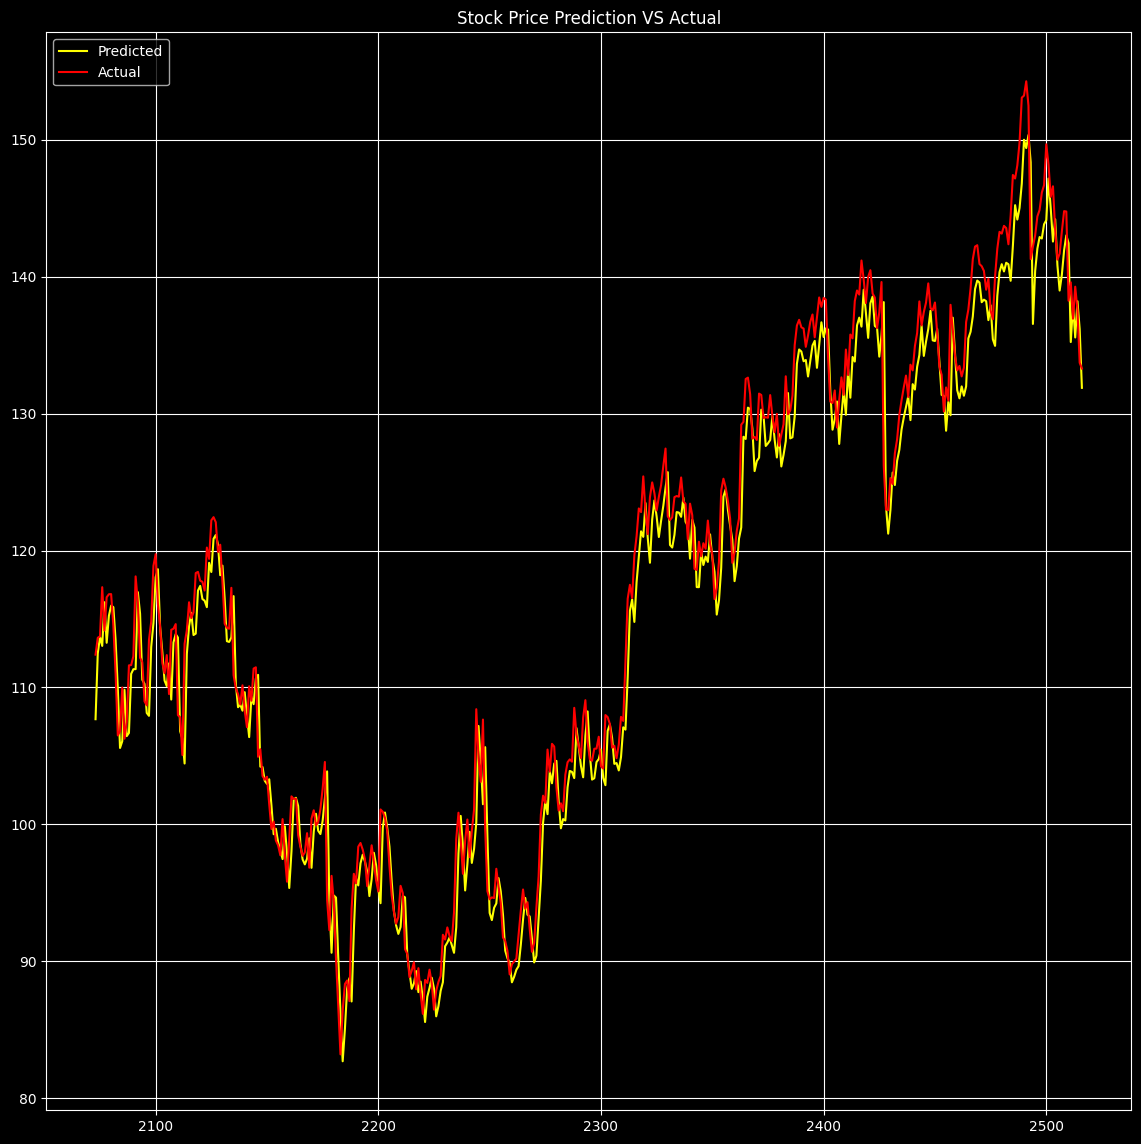

In [256]:
plt.figure(figsize=(14,14))
plt.plot(df1.index[train_size+time_step:], y_test_pred, label='Predicted', color='yellow')
plt.plot(df1.index[train_size+time_step:], y_test_actual, label='Actual', color='red')
plt.legend()
plt.title("Stock Price Prediction VS Actual")
plt.grid(True)
plt.show()

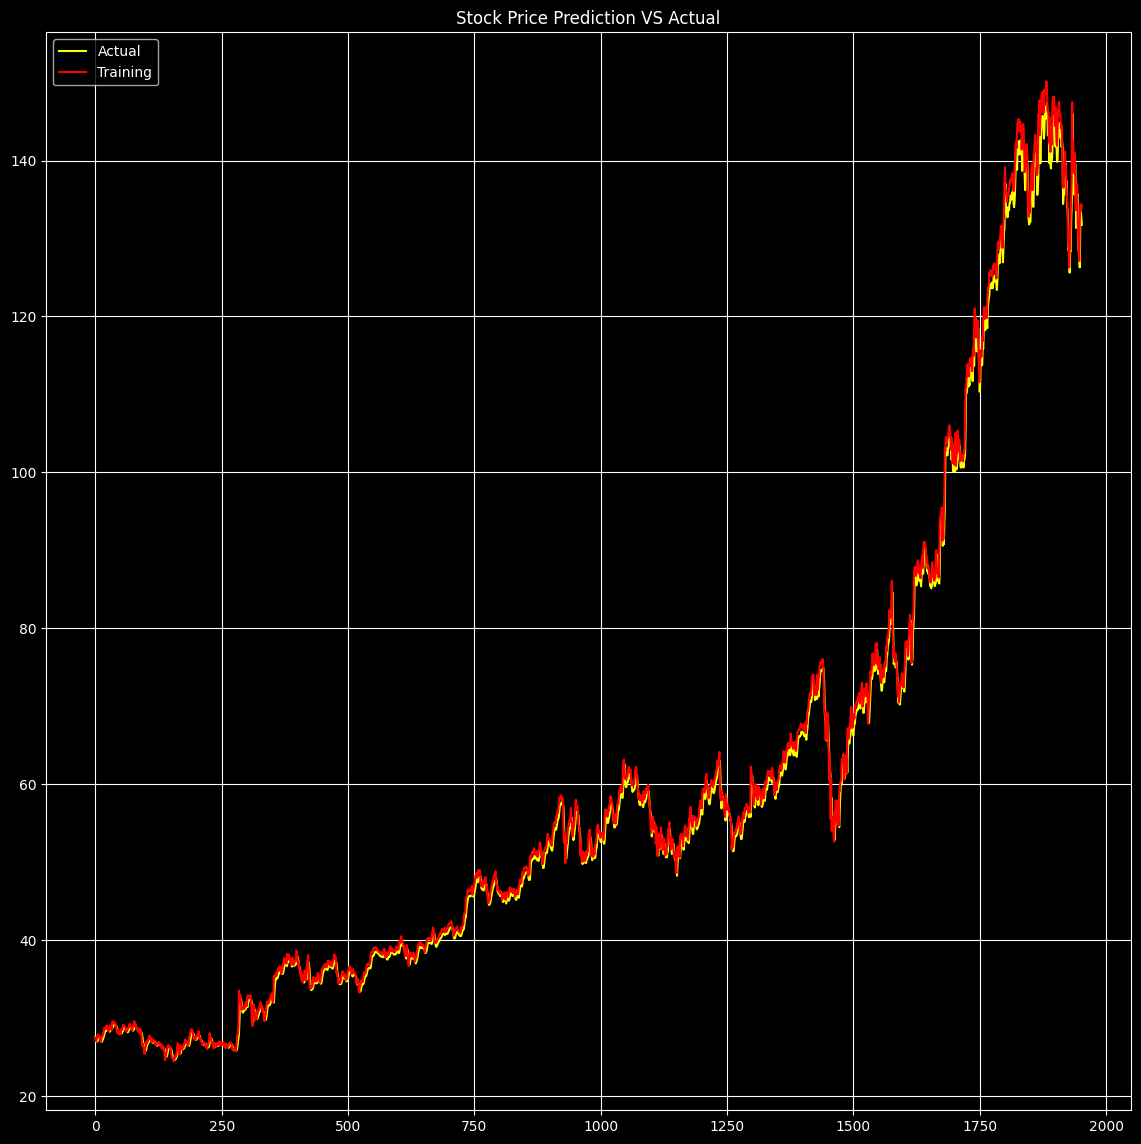

In [254]:
plt.figure(figsize=(14,14))
plt.plot(df1.index[:train_size-time_step], y_train_pred, label='Actual', color='yellow')
plt.plot(df1.index[:train_size-time_step], y_train_actual, label='Training', color='red')
plt.legend()
plt.title("Stock Price Prediction VS Actual")
plt.grid(True)
plt.show()

In [247]:
plt.style.use('dark_background')